In [1]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [4]:
df = pd.read_csv('House Price Prediction.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
train_cols = ['Neighborhood', 'LotArea', 'GrLivArea','OverallCond', 'SalePrice']
train = df[train_cols].copy()
train.head()

,Neighborhood,LotArea,GrLivArea,OverallCond,SalePrice
0,CollgCr,8450,1710,5,208500
1,Veenker,9600,1262,8,181500
2,CollgCr,11250,1786,5,223500
3,Crawfor,9550,1717,5,140000
4,NoRidge,14260,2198,5,250000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Neighborhood  1460 non-null   object
 1   LotArea       1460 non-null   int64 
 2   GrLivArea     1460 non-null   int64 
 3   OverallCond   1460 non-null   int64 
 4   SalePrice     1460 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 57.2+ KB


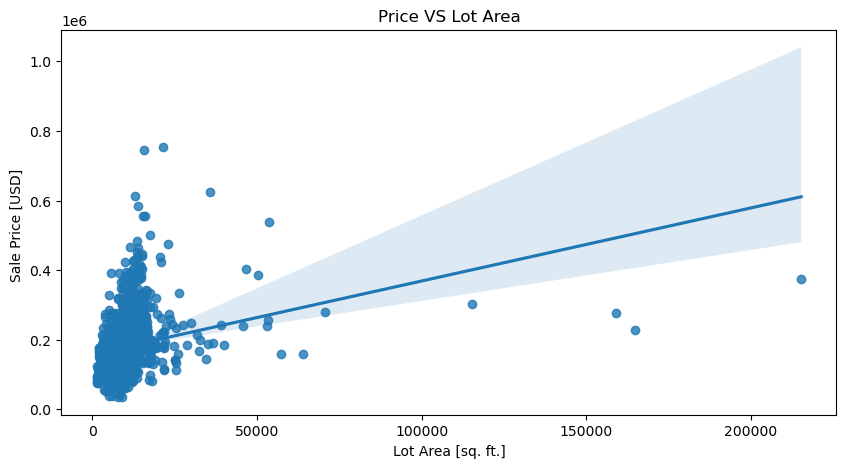

In [8]:
plt.figure(figsize=(10,5))
sns.regplot(x=train['LotArea'], y=train['SalePrice'])

plt.xlabel('Lot Area [sq. ft.]')
plt.ylabel('Sale Price [USD] ')
plt.title('Price VS Lot Area');

In [9]:
train['LotArea'].corr(train['SalePrice'])

0.2638433538714056

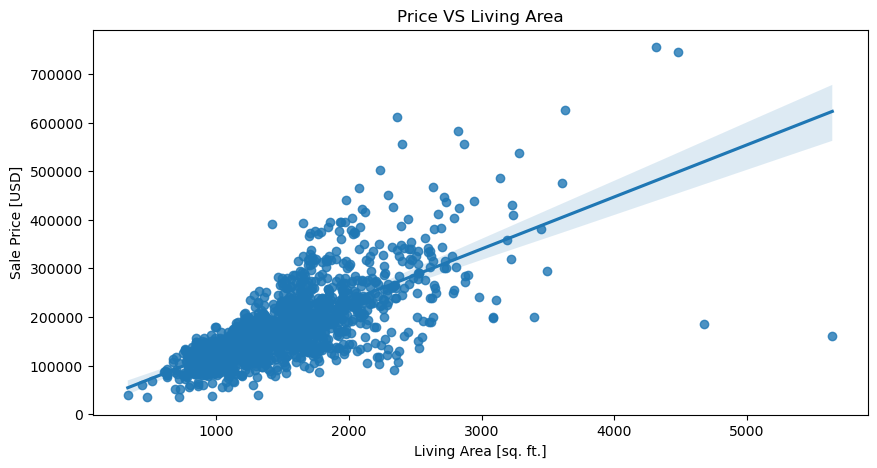

In [10]:
plt.figure(figsize=(10,5))
sns.regplot(x=train['GrLivArea'], y=train['SalePrice'])

plt.xlabel('Living Area [sq. ft.]')
plt.ylabel('Sale Price [USD]')
plt.title('Price VS Living Area');

In [11]:
train['GrLivArea'].corr(train['SalePrice'])

0.7086244776126522

<Axes: xlabel='Neighborhood'>

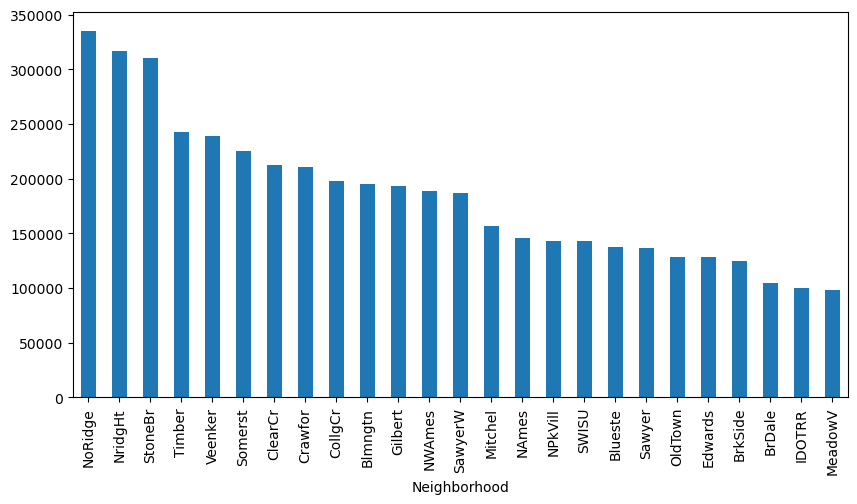

In [12]:
plt.figure(figsize=(10,5))
train.groupby('Neighborhood').SalePrice.mean().sort_values(ascending=False).plot(kind='bar')